In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
%matplotlib inline

In [3]:
# read an edge list into a networkx graph
graph = nx.read_edgelist("Email-Enron.txt", # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )

In [4]:
print 'Total Nodes:', graph.number_of_nodes()
print 'Total Edges:', graph.number_of_edges()
print 'Network Density: %f ' % nx.density(graph)

Total Nodes: 36692
Total Edges: 183831
Network Density: 0.000273 


In [5]:
#compute node degrees of a graph
degree = nx.degree(graph)

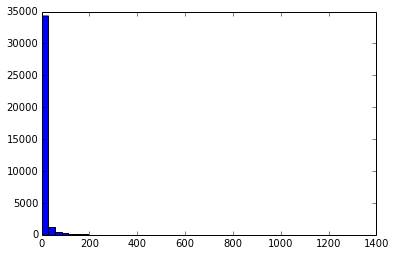

In [16]:
# degree histogram
fig = plt.figure()
plt.hist(degree.values(), bins=50);
plt.show()

In [7]:
components = list(nx.connected_component_subgraphs(graph))
print 'Number of connected subgraphs:', len(components)
largest_component = components[0]
print 'Largest component nodes: ',largest_component.number_of_nodes()
print 'Largest component edges: ',largest_component.number_of_edges()

Number of connected subgraphs: 1065
Largest component nodes:  33696
Largest component edges:  180811


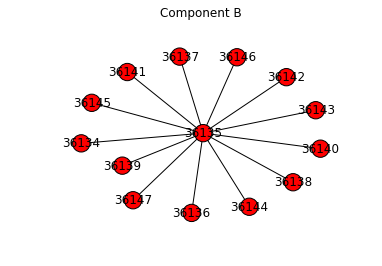

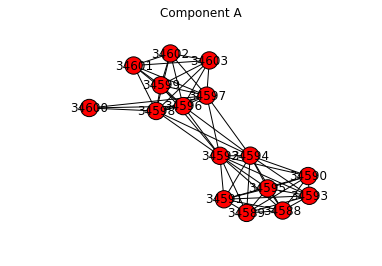

In [8]:
component_map={}
for com in components:
    if (com.number_of_nodes()==16 or com.number_of_nodes()==14):
        component_map[com.number_of_nodes()]=com
        fig = plt.figure()
        plt.title("Component A" if com.number_of_nodes()==16 else "Component B")
        nx.draw_spring(com, with_labels=True)
        plt.show()


In [23]:
component_A = component_map[16]
component_A

In [24]:
max_size = 0
total_cliques = 0
for cliq in nx.find_cliques(component_A):
    total_cliques += 1
    if len(cliq) > max_size: max_size=len(cliq)


print 'Total cliques in Component A: ', total_cliques
print 'Largest clique nodes count: ', max_size
    

Total cliques in Component A:  5
Largest clique nodes count:  8


In [25]:
#Using Betweenness Centrality
betweenness = nx.betweenness_centrality(component_A)
df_b = pd.DataFrame(betweenness.items(), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_b.sort("betweenness", ascending=False)

,node,betweenness
10,34592,0.271769
0,34594,0.187755
2,34598,0.106122
4,34597,0.106122
5,34596,0.106122
3,34599,0.031633
1,34595,0.000000
6,34589,0.000000
7,34588,0.000000
8,34590,0.000000


In [26]:
#Using Closeness Centrality
closeness = nx.closeness_centrality(component_A)
df_c = pd.DataFrame(closeness.items(), columns=["node", "closeness"])
df_c.sort("closeness", ascending=False)

,node,closeness
10,34592,0.789474
0,34594,0.750000
2,34598,0.714286
4,34597,0.714286
5,34596,0.714286
3,34599,0.652174
1,34595,0.555556
6,34589,0.555556
7,34588,0.555556
8,34590,0.555556


In [27]:
#Using EigenVector Centrality
eigenvector = nx.eigenvector_centrality(component_A)
df_e = pd.DataFrame(eigenvector.items(), columns=["node", "eigenvector"])
df_e.sort("eigenvector", ascending=False)

,node,eigenvector
10,34592,0.368005
0,34594,0.343403
2,34598,0.267534
4,34597,0.267534
5,34596,0.267534
1,34595,0.252391
6,34589,0.252391
7,34588,0.252391
8,34590,0.252391
9,34591,0.252391
